In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


%matplotlib inline

In [3]:
dataset = pd.read_csv('Credit_Card_customer_segmentation_dataset.csv')
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


------------- Understanding of each feature ---------------- 

Cust_id (Customer ID): This is a unique number that identifies each credit card holder.

Balance: The amount of money left in the account for making purchases.

Balance Frequency: How often the balance is updated. If it’s updated frequently, it gets a higher score (closer to 1); if not, it gets a lower score (closer to 0).

Purchases: The total amount of purchases made using the account.

One-Off Purchase: The maximum amount spent in a single transaction.

Installments Purchases: The total number of purchases made using credit or through installments (buying now and paying over time)(EMI).

Cash Advance: The amount of cash the customer takes out on credit (using their card to get cash).

Purchases Frequency: How often purchases are made. A higher score means purchases are made frequently, while a lower score indicates they’re less frequent.

One-Off Purchases Frequency: This tracks how often large, one-time purchases are made.

Purchases Installments Frequency: How often purchases on credit/installments are made. A score of 1 means they happen frequently; 0 means they rarely happen.

Cash Advance Frequency: How often the customer withdraws cash using the credit card.

Cash Advance Transactions: The number of times the customer has used the credit card to get a cash advance.

Purchases Transactions: The total number of transactions made for purchases (both small and large).

Credit Limit: The maximum amount of credit available to the customer.

Payments: The total amount of money paid back by the customer.

Minimum Payments: The minimum amount the customer must pay to avoid penalties or interest.

Percentage of Full Payment: The percentage of the total balance the customer has paid off completely.

Tenure: The number of months the customer has had the credit card or the length of time they've been with the credit card company.

In [4]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dataset.drop('CUST_ID', axis=1,inplace=True)

------ dataset analysis to find unique, duplicate values-----------------------------------------------------------------------------------

In [6]:
#trying to find unique_data, missing_values, duplicate_values, data_type in the data
columns = dataset.columns
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [7]:
df_overview = []

for i in columns:
    types = dataset[i].dtype
    unique_data = dataset[i].nunique()
    missing_count = dataset[i].isnull().sum() 
    duplicated = dataset.duplicated().sum()    
    df_overview.append([i , types , unique_data , missing_count, duplicated])
    
df_overview = pd.DataFrame(data=df_overview)
df_overview.columns = ['name of column' , 'types' ,'unique_data' , 'missing value',"duplicated"]
df_overview


    

,name of column,types,unique_data,missing value,duplicated
0,BALANCE,float64,8871,0,0
1,BALANCE_FREQUENCY,float64,43,0,0
2,PURCHASES,float64,6203,0,0
3,ONEOFF_PURCHASES,float64,4014,0,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0
5,CASH_ADVANCE,float64,4323,0,0
6,PURCHASES_FREQUENCY,float64,47,0,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0


In [8]:
#missing value

# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(dataset["CREDIT_LIMIT"])
dataset[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
dataset.drop([5203], axis=0, inplace=True)
dataset.reset_index( inplace = True) #adds another column as index, to account for change in index due to droping of a row
dataset

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
dataset.drop('index',axis=1,inplace = True) #drops old index column
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


------imputation of missing values in MINIMUM_PAYMENTS column-----------------------------------------------------------------------------------

In order to impute the 313 missing values, I decided to find correlation between total amount due to be paid on the card (PURCHASES), vs the MINIMUM_PAYMENTS. I thought that MINIMUM_PAYMENTS would be a percentage of total due amount, but on closely analysing the data, this is not the case.

I can also see that the mean is very high as compared to the median for MINIMUM_PAYEMENTS and the std deviation is also very high, suggesting existence of extreme values in the data. therefore median imputation is better.

first lets try to visualise without imputing values.

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


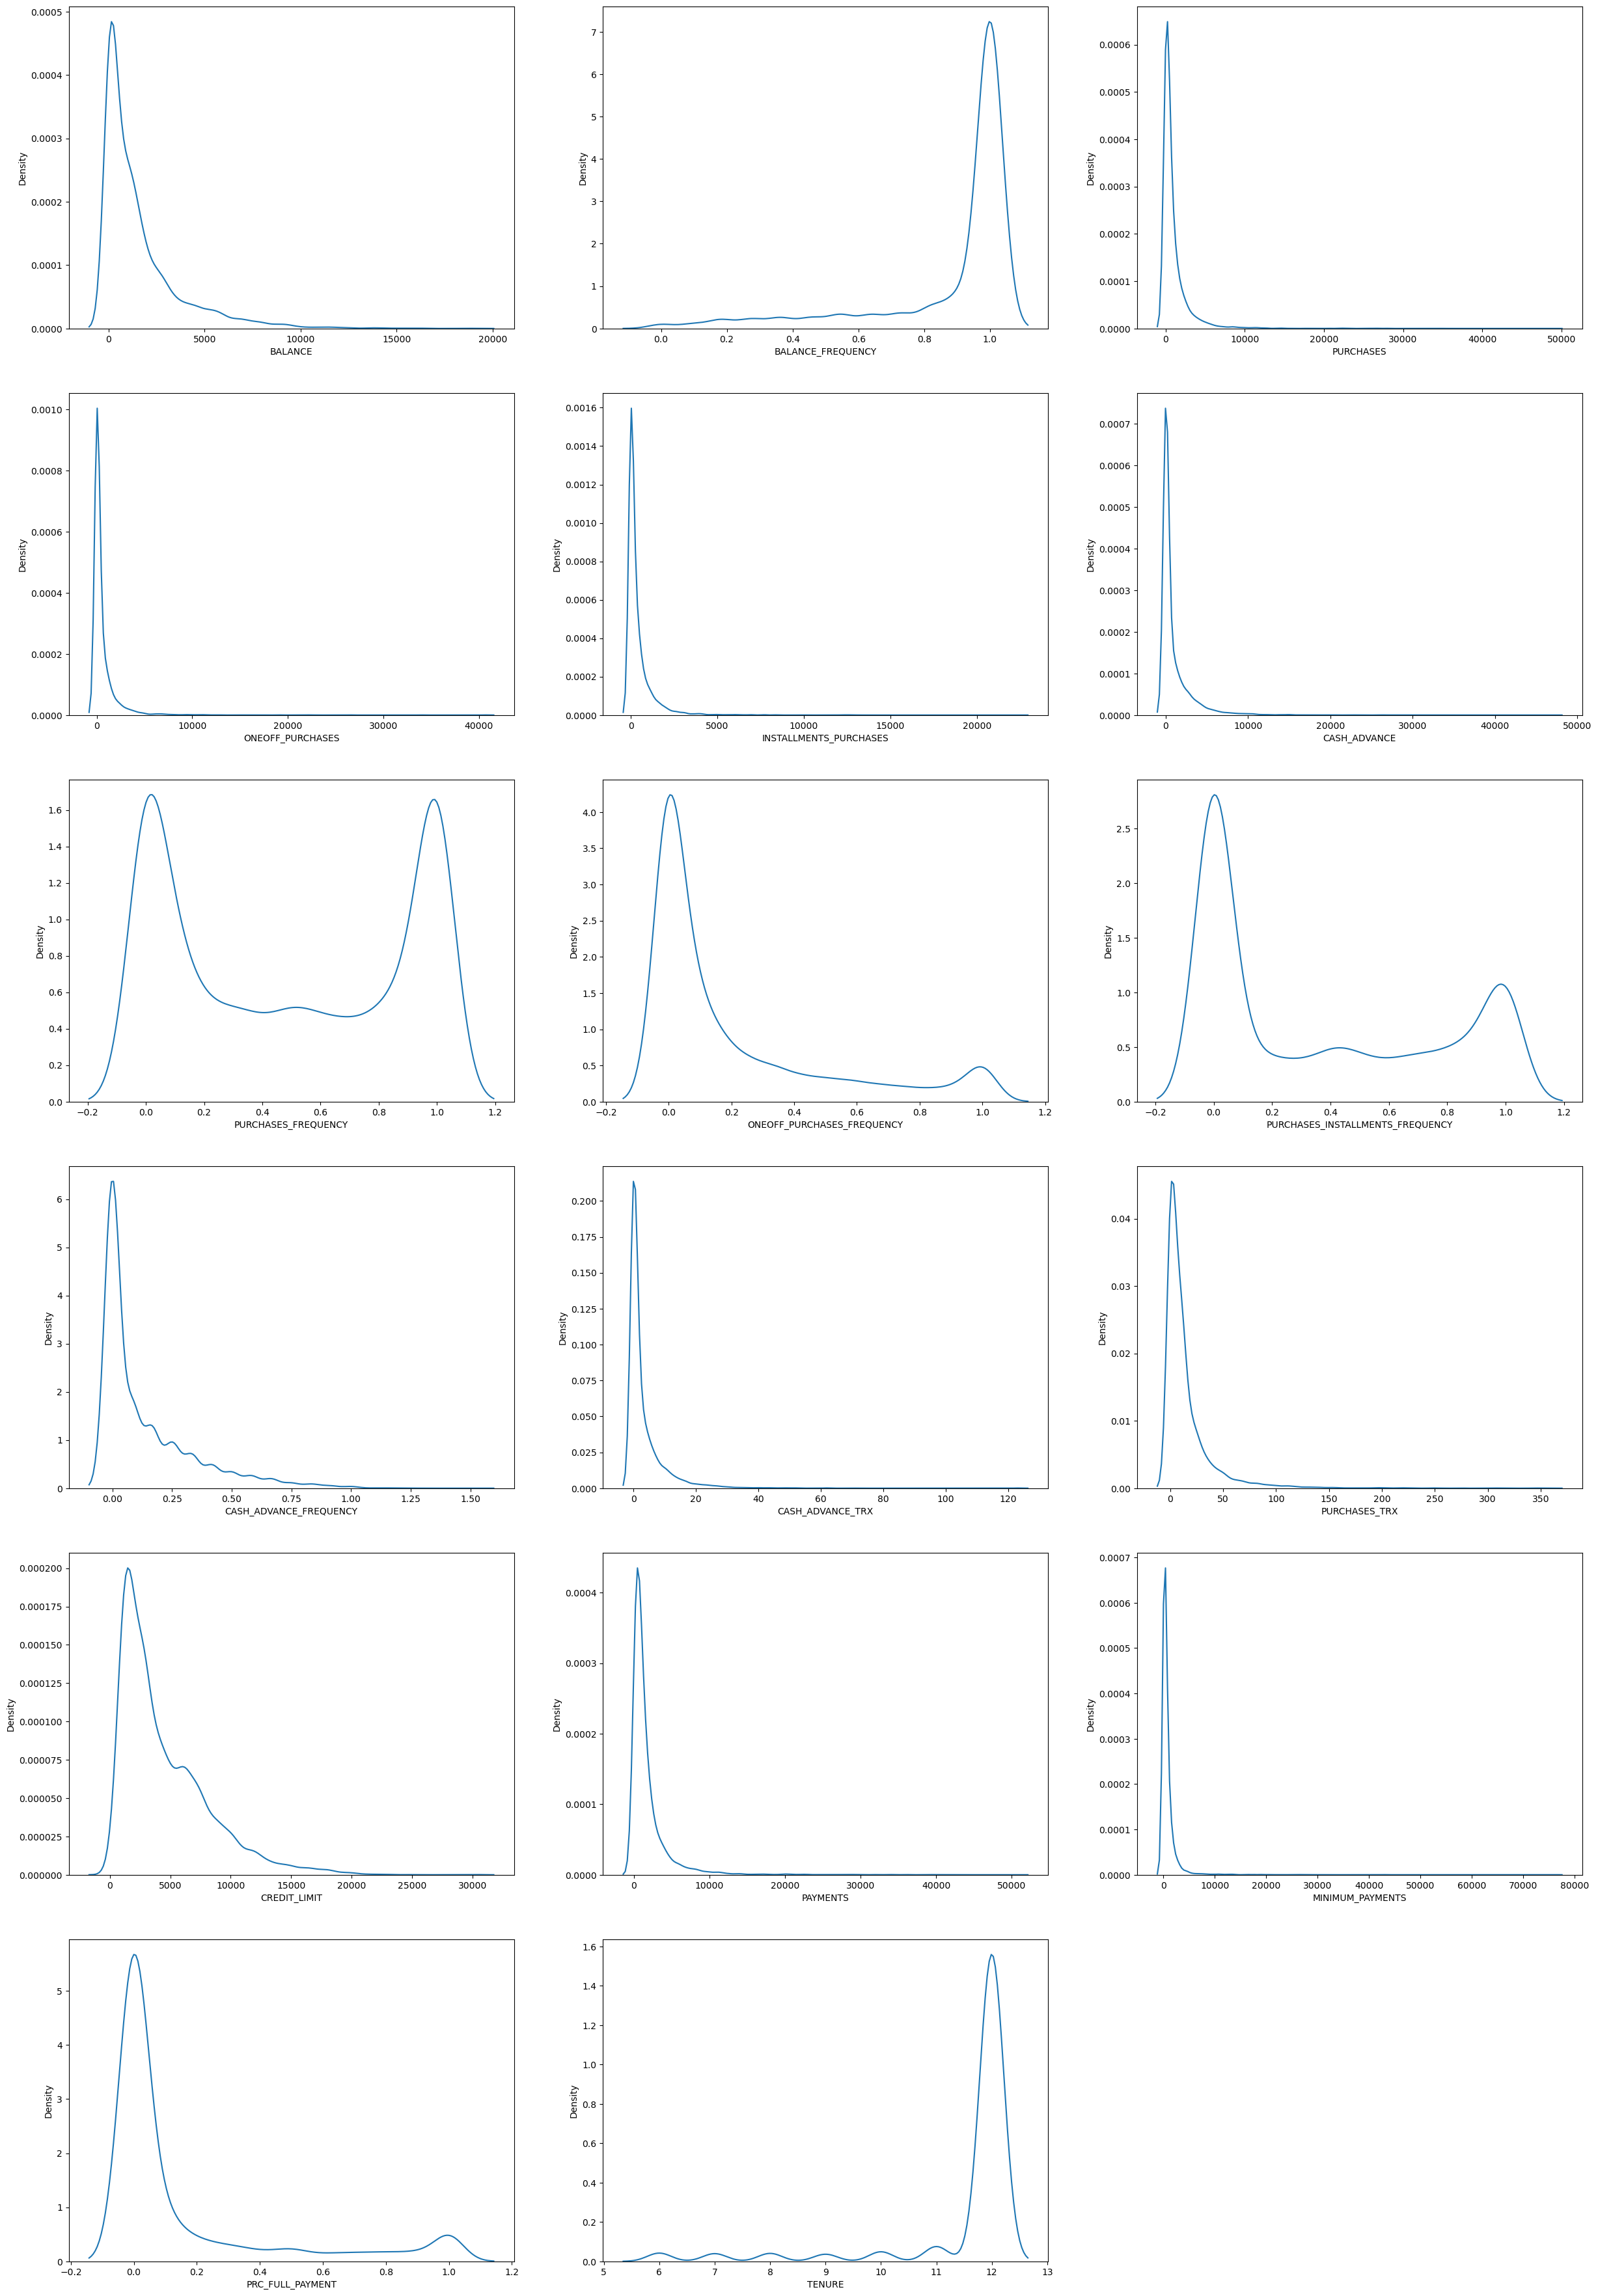

In [11]:
print(dataset.columns)

plt.figure(figsize=(30,45))
for i,col in enumerate(dataset.columns):
    if dataset[col].dtype != 'object':
        axes = plt.subplot(6, 3, i+1) #subplot() takes three arguments - rows, columns, index of the current plot
        #You can draw as many plots you like on one figure, just descibe the number of rows, columns, and the index of the plot.
        sns.kdeplot(dataset[col], ax=axes)
        plt.xlabel(col)
plt.show()

This confirms skewness in data, and in the MINIMUM_PAYEMENTS feature. Therefore we proceed with median imputation to fill missing values

In [12]:
dataset.fillna(dataset.median() , inplace = True)
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We have resolved missing values.

-------------EDA--------------

Text(0.5, 1.0, 'Correlation Matrix')

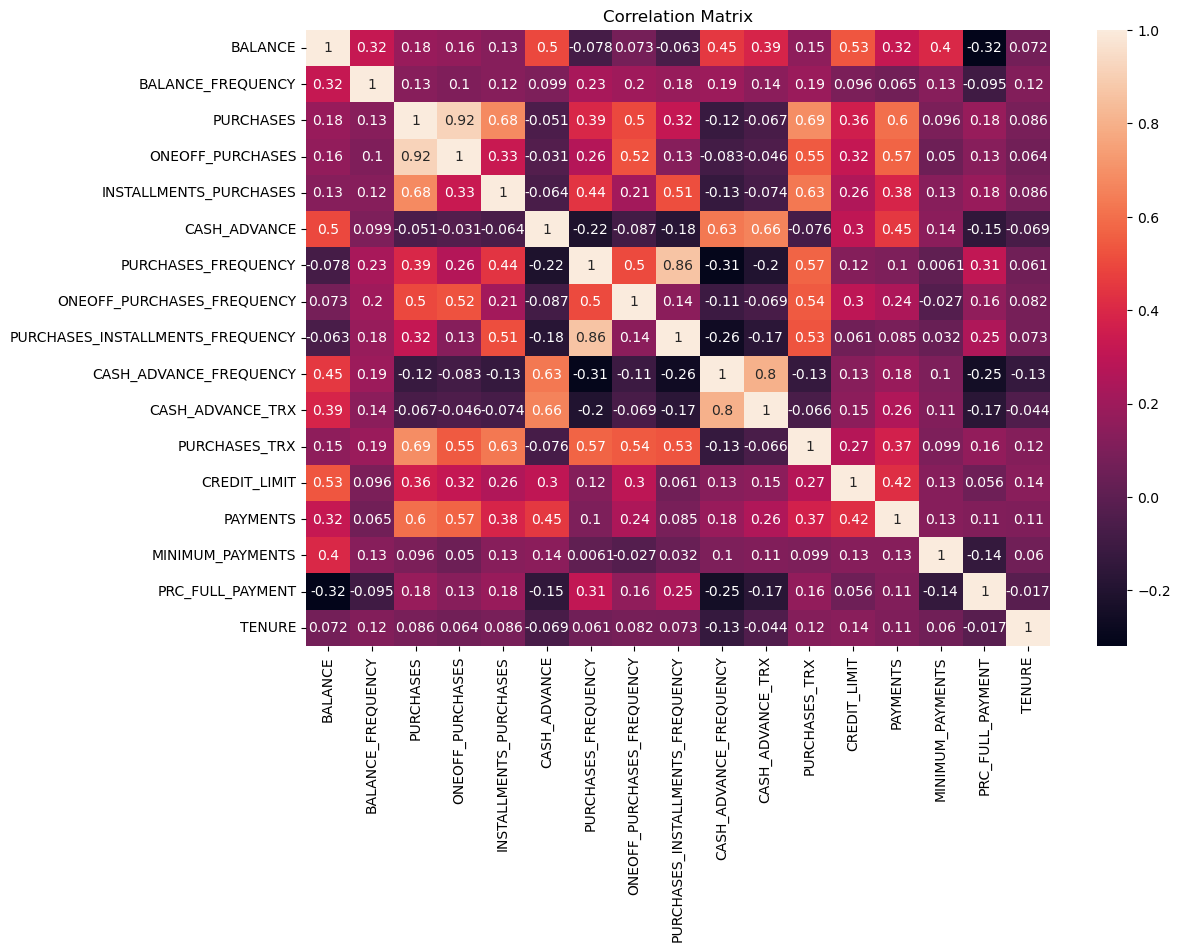

In [13]:
#correlation heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')


In [14]:
# outliers analysis (using IQR)

q1 = dataset.quantile(0.5)
q3 = dataset.quantile(0.75)
iqr = q3-q1

count_out = dataset[(dataset < (q1 - 1.5 * iqr)) | (dataset > (q3 + 1.5 * iqr))].count()

#series to dataframe conversion
outlier_count_df = pd.DataFrame(columns=['count_out'], data=count_out)
outlier_count_df

,count_out
BALANCE,1066
BALANCE_FREQUENCY,2738
PURCHASES,1076
ONEOFF_PURCHASES,1058
INSTALLMENTS_PURCHASES,1035
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,1115
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


There are a lot of outliers in the data.

EDA insights

1) Correlations -
    A)  Purchases and One-off Purchases (0.92): Customers who make more overall purchases also tend to make larger individual purchases. This suggests that higher spending customers are more likely to have large one-off transactions.
    B)  BALANCE and CREDIT_LIMIT (0.53): High correlation here suggests that customers with higher credit limits tend to maintain higher balances.
    C)  PURCHASES and PAYMENTS (0.6): There's likely a strong positive relationship between the amount customers spend and the amount they repay. This makes intuitive sense, as higher spending would generally lead to higher repayments.
    D)  Balance Frequency and Balance (-0.32): Customers who frequently transact, see a reduction in balance, and an increase in frequency of balance updation(frequency)

2) Data distribution - 
    A) Other than BALANCE_FREQUENCY and TENURE, data is heavily right skewed. This suggests that a few customers have significantly higher values for these features compared to the majority, possibly indicating a small group of high-paying or high-balance customers.
    B) The 3 frequency features - Purchases Frequency, One-Off Purchases Frequency, Purchases Installments Frequency - have 2 peaks - 1 representing right skewed data, and other near the frequency score = 1 mark. This is because these features are scored from 0 to 1 and have significant data points with 1 score.

----Clustering------

In [15]:
#scaling the data
from sklearn.preprocessing import
df_model=dataset.copy()

scaler= StandardScaler()
df_Standardized=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df_Standardized



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.341275,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.228291,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.326900,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.338330,0.329128,-4.126919


In [16]:
# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(df_Standardized)
X

array([[-1.6837678 , -1.07256996],
       [-1.1348463 ,  2.50873805],
       [ 0.96906036, -0.38348747],
       ...,
       [-0.92848156, -1.80772394],
       [-2.33744203, -0.65344472],
       [-0.55757775, -0.40028105]])

In [17]:
from sklearn.cluster import KMeans


In [18]:
#elbow method
wcss = [] 
for k in range(1,10): 
    kmeans = KMeans(n_clusters=k, init="k-means++") 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 

In [19]:
wcss

[72429.79567497285,
 50051.31541837412,
 33025.675418049585,
 24542.50687083752,
 19483.90286988777,
 16238.837670575116,
 13823.497311707919,
 12792.514715495792,
 11317.89907365742]

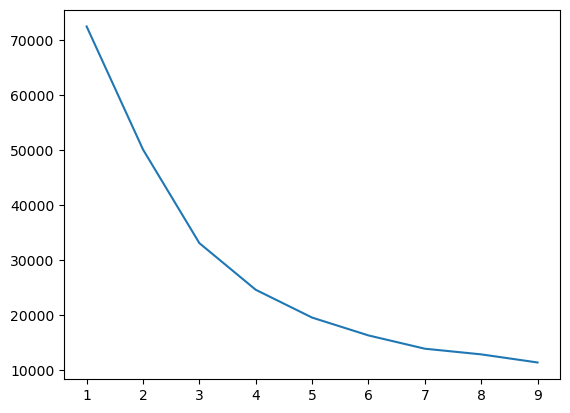

In [20]:
# plot elbow curve 
plt.plot(range(1,10),wcss)

Cross verifying that k=4 is best fit using KneeLocator

In [21]:
!conda install kneed -y

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [23]:
from kneed import KneeLocator
kl = KneeLocator(range(1,10),wcss,curve="convex",direction="decreasing")
kl.elbow

4

clearly the elbow lies at k = 4 

In [27]:
#implementing k means

kmeans = KMeans(n_clusters=4)
labelsofkmeans = kmeans.fit_predict(X)
labelsofkmeans    #The values in labelsofkmeans represent the cluster assignments for each sample in dataset X


array([1, 0, 3, ..., 1, 1, 1], dtype=int32)

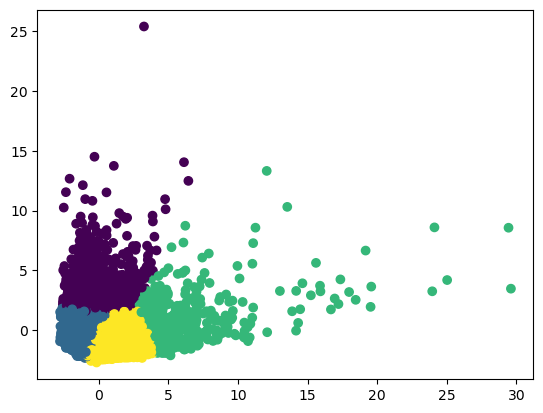

In [32]:
plt.scatter(X[:,0],X[:,1],c=labelsofkmeans) # X[:,0] is the 1st Principal Component and X[:,1] is the 2nd

KMeans Silhouette Score: 0.4073923725795533, Davies-Bouldin Index: 0.8009135427940037, Calinski-Harabasz Index: 5817.648203531942
DBSCAN Silhouette Score: 0.5841038480301015, Davies-Bouldin Index: 1.4044993797974712, Calinski-Harabasz Index: 428.34273661409355
Hierarchical Clustering Silhouette Score: 0.3556148647088042, Davies-Bouldin Index: 0.8127172447343742, Calinski-Harabasz Index: 4914.429892449742


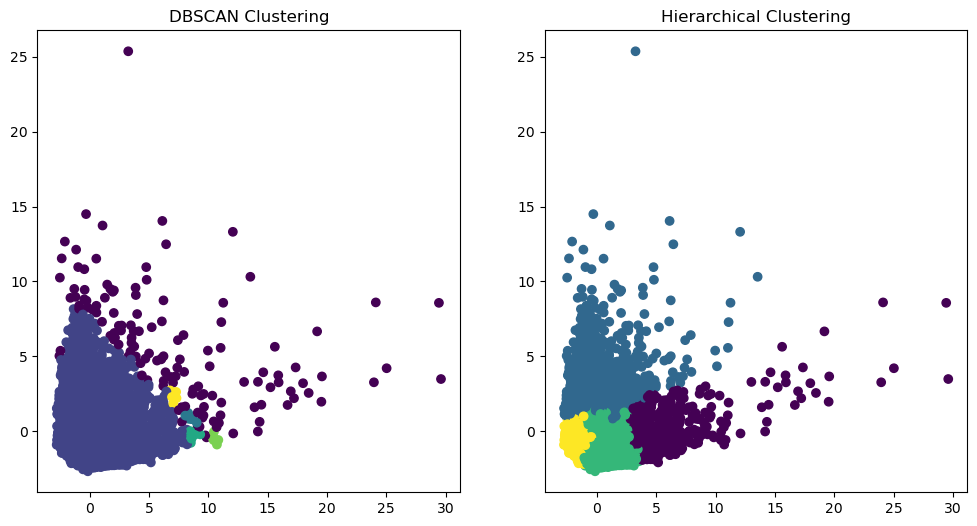

In [29]:

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=4)  # Assuming 4 clusters for comparison
hierarchical_labels = hierarchical.fit_predict(X)

#  Silhouette Scores
kmeans_silhouette = silhouette_score(X, labelsofkmeans)  
dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # Handle edge case
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

# Davies-Bouldin Index
kmeans_davies_bouldin = davies_bouldin_score(X, labelsofkmeans)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
hierarchical_davies_bouldin = davies_bouldin_score(X, hierarchical_labels)

# Calinski-Harabasz Index
kmeans_calinski_harabasz = calinski_harabasz_score(X, labelsofkmeans)
dbscan_calinski_harabasz = calinski_harabasz_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
hierarchical_calinski_harabasz = calinski_harabasz_score(X, hierarchical_labels)

# Output Scores
print(f"KMeans Silhouette Score: {kmeans_silhouette}, Davies-Bouldin Index: {kmeans_davies_bouldin}, Calinski-Harabasz Index: {kmeans_calinski_harabasz}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}, Davies-Bouldin Index: {dbscan_davies_bouldin}, Calinski-Harabasz Index: {dbscan_calinski_harabasz}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}, Davies-Bouldin Index: {hierarchical_davies_bouldin}, Calinski-Harabasz Index: {hierarchical_calinski_harabasz}")
# Visualizing Clusters for DBSCAN and Hierarchical Clustering
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# DBSCAN plot
axs[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis') 
axs[0].set_title('DBSCAN Clustering')

# Hierarchical Clustering plot
axs[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title('Hierarchical Clustering')

plt.show()


KMeans seems to be the most balanced option given its superior performance on the Davies-Bouldin Index (better separation) and Calinski-Harabasz Index (good cluster dispersion). Although the Silhouette score is slightly lower than DBSCAN, KMeans still provides the best combination of compact and distinct clusters overall. 

I decide to choose K means, because it appears to give better cluster seperation, which is something I desire for this analysis.

In [30]:
dataset['cluster_result'] = labelsofkmeans+1
dataset['cluster_result'] = 'Cluster '+dataset['cluster_result'].astype(str)

df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = dataset.describe().loc[['mean']].T

df_cluster_summary = dataset.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile

,Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
0,BALANCE,mean,4505.865912,1012.057577,3438.864462,827.624103,1564.647593
1,BALANCE_FREQUENCY,mean,0.963515,0.799406,0.988192,0.921423,0.877350
2,PURCHASES,mean,462.628331,224.037208,6958.065903,1248.019393,1003.316936
3,ONEOFF_PURCHASES,mean,300.247673,157.764151,4552.199838,629.543231,592.503572
4,INSTALLMENTS_PURCHASES,mean,162.479912,66.600999,2407.083103,618.681620,411.113579
5,CASH_ADVANCE,mean,4400.456157,611.557569,788.083944,147.825347,978.959616
6,PURCHASES_FREQUENCY,mean,0.266446,0.191588,0.954026,0.864242,0.490405
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.129792,0.074899,0.725687,0.304456,0.202480
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.166388,0.111329,0.809635,0.676479,0.364478
9,CASH_ADVANCE_FREQUENCY,mean,0.470794,0.121896,0.086019,0.030830,0.135141


------- Based on the table above, it can be concluded that each cluster has the following characteristics:
Cluster 1 (Installment Users): Customers in this group primarily use credit cards for installment purchases, indicated by the high frequency of installment transactions. They tend to make large individual transactions but seldom use cash advances or make frequent payments. These users rarely engage in one-off purchases or cash advances, making them ideal candidates for credit cards tailored to installment purposes.

Cluster 2 (Full Payers Users): Customers in this cluster are frequent and active credit card users, reflected by their constantly changing and relatively high balances. This cluster shows higher averages in several aspects compared to other groups. These users actively utilize credit cards for both transactions and installments, and they tend to have a longer tenure, which correlates with better credit scores.

Cluster 3 (Cash Advance/Withdraw Users): Customers in this group frequently use cash advances and maintain high but fluctuating balances. They also enjoy lower interest rates and the second-highest credit limit among the clusters. However, they rarely engage in installment plans or typical purchases. Their primary use of credit cards revolves around cash withdrawals.

Cluster 4 (Starter/Student Users): These customers infrequently use their credit cards, either for transactions or installments. They maintain low balances, and their credit limits and frequency of transactions are minimal. It’s likely that this group consists of students or new credit card users, who primarily use their cards for limited cash advances.

Suggested Marketing Strategies:

Customers in cluster 2 can become the main target for credit card marketing. This is because customers in this cluster are very active in using credit cards, and customers have the highest tenure and credit limits compared to other clusters. By focusing marketing on this cluster, banks can increase their profits by using more/frequent credit cards and streamlining marketing costs incurred. Banks can offer benefits or rewards for using credit cards to attract customers to use credit cards more often.

For credit cards specifically for installments, banks can focus their marketing on customers in cluster 1. This is because customers in cluster 1 are more likely to make credit card transactions for installment purposes. Banks can offer installment programs that are low or 0% interest and can be used for various installment needs to customers in this cluster to attract customers to use credit cards. The installment requirements that can be offered can be in the form of travelling payments, household appliances, electronic devices, smartphones, or certain brands that are most in demand by the public.

Since customers in cluster 3 tend to make cash advances, banks can offer special credit cards with various benefits. These benefits can be in the form of low or no cash advance or admin fees, low interest, relatively high tenure, etc. In addition, banks can also offer bank programs other than credit cards, such as pay-later programs with third-party collaborations or personal loans provided by banks.

For cluster 4, banks can offer special credit cards for beginners or students (entry-level cards) who may lack an extensive credit profile. This credit card can be used to build their credit and learn how to use the credit card responsibly. This card can include several features, such as waived fees, rewards for setting a routine of timely payments, low barriers to becoming a cardholder and lenient interest rates. Also, banks can offer opportunities to upgrade to new products and better terms and conditions if the customer consistently pays the bills on time. In addition, banks can offer sign-up rewards so that customers who are not users of the bank's credit card can be interested in registering.